In [3]:
import numpy as np #矩阵运算
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
lists1=np.array([[0.28,1.31,-6.2],
                 [0.07,0.58,-0.78],
                 [1.54,2.01,-1.63],
                 [-0.44,1.18,-4.32],
                 [-0.81,0.21,5.73],
                 [1.52,3.16,2.77],
                 [2.20,2.42,-0.19],
                 [0.91,1.94,6.21],
                 [0.65,1.93,4.38],
                 [-0.26,0.82,-0.96]])

lists2=np.array([[0.011,1.03,-0.21],
                 [1.27,1.28,0.08],
                 [0.13,3.12,0.16],
                 [-0.21,1.23,-0.11],
                 [-2.18,1.39,-0.19],
                 [0.34,1.96,-0.16],
                 [-1.38,0.94,0.45],
                 [-0.12,0.82,0.17],
                 [-1.44,2.31,0.14],
                 [0.26,1.94,0.08]])

lists3=np.array([[1.36,2.17,0.14],
                 [1.41,1.45,-0.38],
                 [1.22,0.99,0.69],
                 [2.46,2.19,1.31],
                 [0.68,0.79,0.87],
                 [2.51,3.22,1.35],
                 [0.60,2.44,0.92],
                 [0.64,0.13,0.97],
                 [0.85,0.58,0.99],
                 [0.66,0.51,0.88]])
list_point = [np.array([0.5,1.0,0.0]),np.array([0.31,1.51,-0.50]),
              np.array([-0.3,0.44,-0.1])]
list_group = [lists1,lists2,lists3]

list_point2 = [np.array([-0.41,0.82,0.88]),np.array([0.14,0.72,4.1]),
              np.array([-0.81,0.61,-0.38])]

### parzen窗

In [5]:
def getpxitem(point_aim,point_item,h):
    temp = point_aim-point_item
    mici = np.dot(temp,temp.T)/(2*pow(h, 2))
    return np.exp(-mici)/((2*np.pi)**0.5)

In [6]:
# def getpx(points,point,h):
#     point = np.matrix(point)
#     n = len(points)
#     m_points = np.matrix(points)#10x3
#     sigma = 0
#     for i in m_points:
#         sigma = sigma + getpxitem(point,i,h)
#     return float(sigma/n)

def getpx(points,point,h):
    point = np.matrix(point)
    n = len(points)
    m_points = np.matrix(points)#10x3
    sigma = 0
    for i in m_points:
        sigma = sigma + getpxitem(point,i,h)
    return float(sigma/(n*h*h*h))

In [7]:
def descript(list_group,list_point,h):
    for p in list_point:
        print("测试点",p)
        pos = 1
        i = 0
        maxpx = 0
        for points in list_group:
            i = i+1
            temp = getpx(points,p,h)
            if(temp>maxpx):
                maxpx = temp
                pos = i
            print('在样本集w'+str(i)+"下的概率密度为",temp)
        print("因此我们将",p,"归为w"+str(pos))
        print("---------------------------------")

In [8]:
descript(list_group,list_point,1)

测试点 [0.5 1.  0. ]
在样本集w1下的概率密度为 0.050234405015983905
在样本集w2下的概率密度为 0.18793313079292684
在样本集w3下的概率密度为 0.15878419484781175
因此我们将 [0.5 1.  0. ] 归为w2
---------------------------------
测试点 [ 0.31  1.51 -0.5 ]
在样本集w1下的概率密度为 0.061213126923756335
在样本集w2下的概率密度为 0.19260786786365375
在样本集w3下的概率密度为 0.0901699142163708
因此我们将 [ 0.31  1.51 -0.5 ] 归为w2
---------------------------------
测试点 [-0.3   0.44 -0.1 ]
在样本集w1下的概率密度为 0.0558152640204981
在样本集w2下的概率密度为 0.15090164416412882
在样本集w3下的概率密度为 0.07273185539604424
因此我们将 [-0.3   0.44 -0.1 ] 归为w2
---------------------------------


In [9]:
descript(list_group,list_point,0.1)

测试点 [0.5 1.  0. ]
在样本集w1下的概率密度为 3.5005969554957954e-20
在样本集w2下的概率密度为 2.700448085924117e-05
在样本集w3下的概率密度为 3.1916135837019276e-17
因此我们将 [0.5 1.  0. ] 归为w2
---------------------------------
测试点 [ 0.31  1.51 -0.5 ]
在样本集w1下的概率密度为 1.1454097051470594e-20
在样本集w2下的概率密度为 4.788040708256211e-06
在样本集w3下的概率密度为 8.614476229511478e-26
因此我们将 [ 0.31  1.51 -0.5 ] 归为w2
---------------------------------
测试点 [-0.3   0.44 -0.1 ]
在样本集w1下的概率密度为 1.45100204839023e-12
在样本集w2下的概率密度为 0.0001509236162806271
在样本集w3下的概率密度为 4.24484989194214e-40
因此我们将 [-0.3   0.44 -0.1 ] 归为w2
---------------------------------


In [10]:
descript(list_group,list_point,1)

测试点 [0.5 1.  0. ]
在样本集w1下的概率密度为 0.050234405015983905
在样本集w2下的概率密度为 0.18793313079292684
在样本集w3下的概率密度为 0.15878419484781175
因此我们将 [0.5 1.  0. ] 归为w2
---------------------------------
测试点 [ 0.31  1.51 -0.5 ]
在样本集w1下的概率密度为 0.061213126923756335
在样本集w2下的概率密度为 0.19260786786365375
在样本集w3下的概率密度为 0.0901699142163708
因此我们将 [ 0.31  1.51 -0.5 ] 归为w2
---------------------------------
测试点 [-0.3   0.44 -0.1 ]
在样本集w1下的概率密度为 0.0558152640204981
在样本集w2下的概率密度为 0.15090164416412882
在样本集w3下的概率密度为 0.07273185539604424
因此我们将 [-0.3   0.44 -0.1 ] 归为w2
---------------------------------


In [11]:
descript(list_group,list_point,0.1)

测试点 [0.5 1.  0. ]
在样本集w1下的概率密度为 3.5005969554957954e-20
在样本集w2下的概率密度为 2.700448085924117e-05
在样本集w3下的概率密度为 3.1916135837019276e-17
因此我们将 [0.5 1.  0. ] 归为w2
---------------------------------
测试点 [ 0.31  1.51 -0.5 ]
在样本集w1下的概率密度为 1.1454097051470594e-20
在样本集w2下的概率密度为 4.788040708256211e-06
在样本集w3下的概率密度为 8.614476229511478e-26
因此我们将 [ 0.31  1.51 -0.5 ] 归为w2
---------------------------------
测试点 [-0.3   0.44 -0.1 ]
在样本集w1下的概率密度为 1.45100204839023e-12
在样本集w2下的概率密度为 0.0001509236162806271
在样本集w3下的概率密度为 4.24484989194214e-40
因此我们将 [-0.3   0.44 -0.1 ] 归为w2
---------------------------------


### 求积分

In [9]:
# from scipy.integrate import quad,dblquad,nquad
# print(quad(lambda  x:np.exp(-x),0,np.inf))
# #     '''求积分，np.inf代表正无穷。
# #     结果第一个数值代表运算结果，第二个数值代表误差
# #     '''
# print(dblquad(lambda t,x:np.exp(-x*t)/t**3,0,np.inf,lambda x:1,lambda x:np.inf))
# #     '''
# #     求二重积分 然后给t,x赋积分区间
# #     lambda是匿名函数
# #     '''

(1.0000000000000002, 5.842606996763696e-11)
(0.3333333333366853, 1.3888461883425516e-08)


### k近邻

In [12]:

# 计算欧几里得距离
def distance(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2))) # 求两个向量之间的距离

In [13]:
#返回包含k个点的最短半径
def getNearest(point , points , k):
    m_dis={}
    pos =0
    for i in points:
        pos = pos+1
        m_dis[pos] = distance(point,i)
    sortlist=sorted(m_dis.items(),key = lambda x:x[1],reverse = False)    
    return sortlist[k-1][1]

In [14]:
#根据不同维数算px
def getY(dis,dim,k):
    total = 10
    if dim == 1:
        result = (k/total)/(2*dis)
    elif dim == 2:
        result = (k/total)/(np.pi*dis*dis)
    elif dim == 3 :
        result = (k/total)/((4/3)*(np.pi*dis*dis*dis))
    else:
        result = 0
    return result

#### 一维

In [15]:
def drawPx1d(k):
    #最大2.51，最小0.60，于是去区间为[0.5,2.6]
    x = list(np.arange(0.5,2.6,0.01))
    y = []
    for i in x:
        dis = getNearest(np.matrix(i),np.matrix(lists3[:,0]).T,k)
        y.append(getY(dis,1,k)) 
    plt.figure()
    plt.plot(x,y)

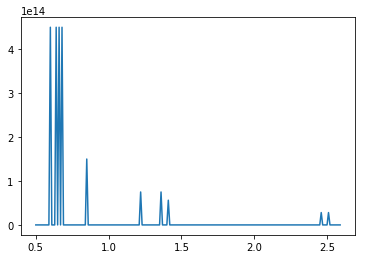

In [69]:
drawPx1d(k=1)

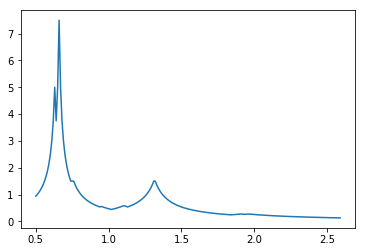

In [96]:
drawPx1d(k=3)

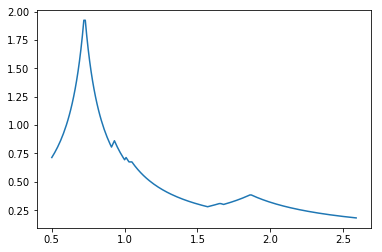

In [97]:
drawPx1d(k=5)

#### 二维

In [27]:
def drawPx2d(k):
    #x最小-2.18，最大1.27，于是去区间为[-2.20，1.30]
    #y最小0.82，最大3.12，于是去区间为[0.80，3.15]
    x = list(np.arange(-2.20,1.30,0.03))
    y = list(np.arange(0,3.15,0.03))
    X, Y = np.meshgrid(x, y)
    z = []
    for j in y:
        temp = []
        for i in x:
            dis = getNearest(np.matrix([i,j]),np.matrix(lists2[:,[0,1]]),k)
            temp.append(getY(dis,2,k))
        z.append(temp)
    Z = np.array(z)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
    plt.show()

In [28]:
def drawPx2d1(k):
    #x最小-2.18，最大1.27，于是去区间为[-2.20，1.30]
    #y最小0.82，最大3.12，于是去区间为[0.80，3.15]
    x = list(np.arange(-2.20,1.30,0.03))
    y = list(np.arange(0,3.15,0.03))
#     x = list(np.arange(-2.50,1.50,0.04))
#     y = list(np.arange(0,4,0.04))
    X, Y = np.meshgrid(x, y)
    z = []
    for j in y:
        temp = []
        for i in x:
            dis = getNearest(np.matrix([i,j]),np.matrix(lists2[:,[0,1]]),k)
            temp.append(getY(dis,2,k))
        z.append(temp)
    Z = np.array(z)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.view_init(elev=90., azim=90)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
    plt.show()

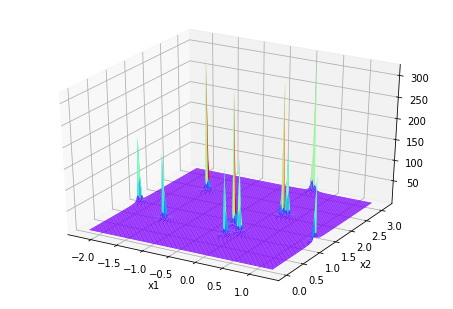

In [29]:
drawPx2d(1)

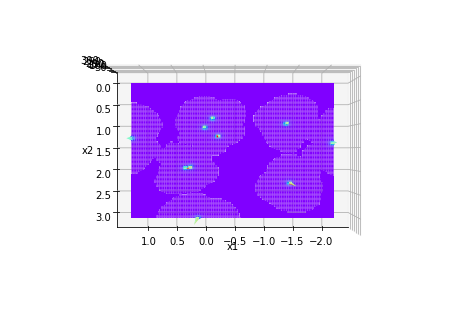

In [30]:
 drawPx2d1(1)

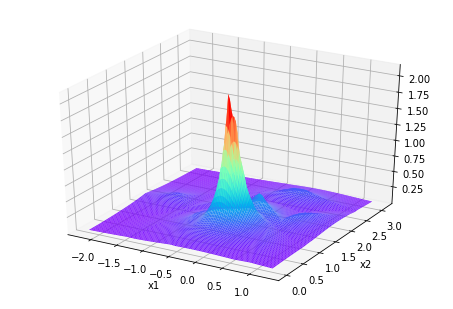

In [31]:
drawPx2d(3)

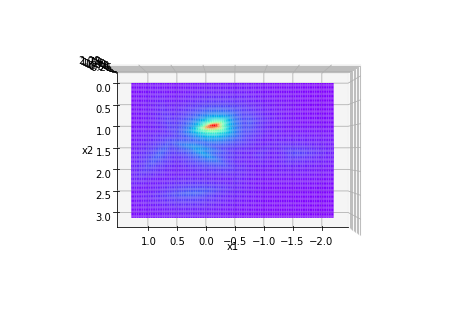

In [32]:
drawPx2d1(3)

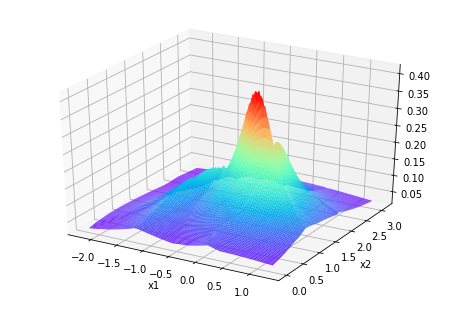

In [33]:
drawPx2d(5)

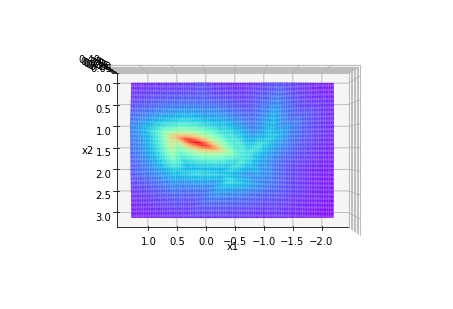

In [34]:
drawPx2d1(5)

#### 三维

In [35]:
def classification(testPoints,pointList,k):
    x=0
    for i in testPoints:
        print("测试点",i)
        x=x+1
        pos =0
        maxpx = 0
        maxpos = 0
        for j in pointList:
            pos = pos+1
            dis = getNearest(np.matrix(i),np.matrix(j),k)
            temp = getY(dis,3,k)
            if(temp>=maxpx):
                maxpos = pos
                maxpx = temp
            print('在样本集w'+str(pos)+"下的概率密度为",temp)
        print("---------------------------------")
    

In [36]:
classification(list_point2,list_group,5)

测试点 [-0.41  0.82  0.88]
在样本集w1下的概率密度为 0.002614944210445274
在样本集w2下的概率密度为 0.033276646733531694
在样本集w3下的概率密度为 0.02658111207846173
---------------------------------
测试点 [0.14 0.72 4.1 ]
在样本集w1下的概率密度为 0.0010255387557116637
在样本集w2下的概率密度为 0.001549253321558584
在样本集w3下的概率密度为 0.002586099273986083
---------------------------------
测试点 [-0.81  0.61 -0.38]
在样本集w1下的概率密度为 0.0018676527558116678
在样本集w2下的概率密度为 0.029813898753325307
在样本集w3下的概率密度为 0.0094855259161561
---------------------------------


#### 散点图